In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

In [2]:
pattern_PbTe_10_10 = os.path.join('3-PbTe-thinfilm', 'PbTe', '10-10', '*.dat')
dat_files_list_PbTe_10_10 = glob.glob(pattern_PbTe_10_10, recursive=True)

pattern_substrato_10_10 = os.path.join('3-PbTe-thinfilm', 'substrato', '10-10', '*.dat')
dat_files_list_substrato_10_10 = glob.glob(pattern_substrato_10_10, recursive=True)

In [10]:
dict_with_all_dfs_PbTe_10_10 = {}
for path in dat_files_list_PbTe_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_PbTe_10_10[df_name] = [df, temperature]

In [9]:
dict_with_all_dfs_substrato_10_10 = {}
for path in dat_files_list_substrato_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_substrato_10_10[df_name] = [df, temperature]

In [65]:
temperatures = []
dict_with_mean_dfs_PbTe_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_PbTe_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_PbTe_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_PbTe_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [66]:
temperatures = []
dict_with_mean_dfs_substrato_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_substrato_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_substrato_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_substrato_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [81]:
c = 3e8 # meter per second
N = len(dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'])
d_film = 0.0016e-3
print(f"c = {c:.1e} m/s \nN = {N} \nfilm thickness = {d_film*1e6:1.1f} um")

c = 3.0e+08 m/s 
N = 601 
film thickness = 1.6 um


In [70]:
id_max_X = dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_PbTe_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][id_max_X])*2e-3/c

In [71]:
id_max_X = dict_with_mean_dfs_substrato_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_substrato_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][id_max_X])*2e-3/c

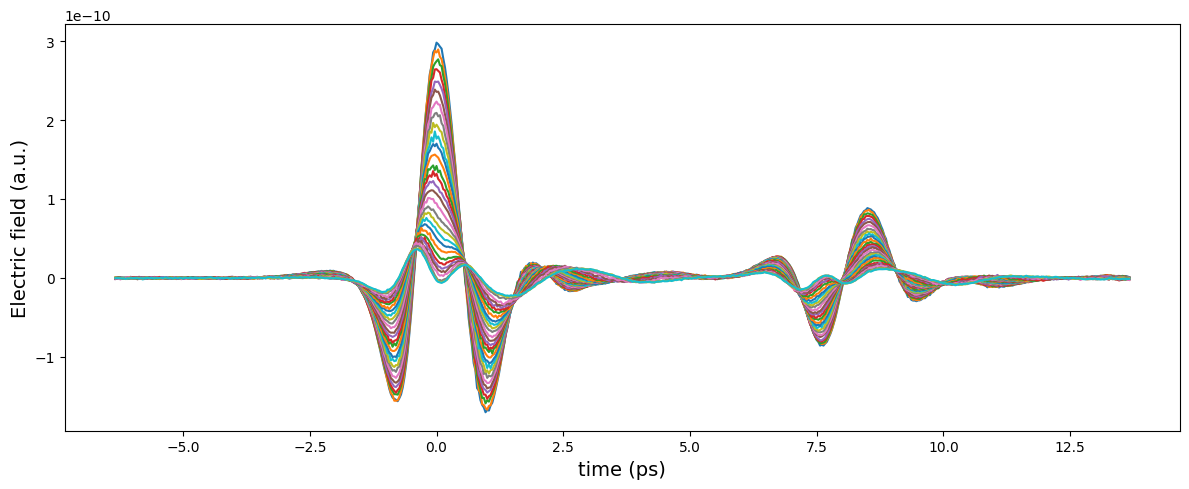

In [82]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_PbTe_10_10.items():
    # if df[1]<200:
    #     continue
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()

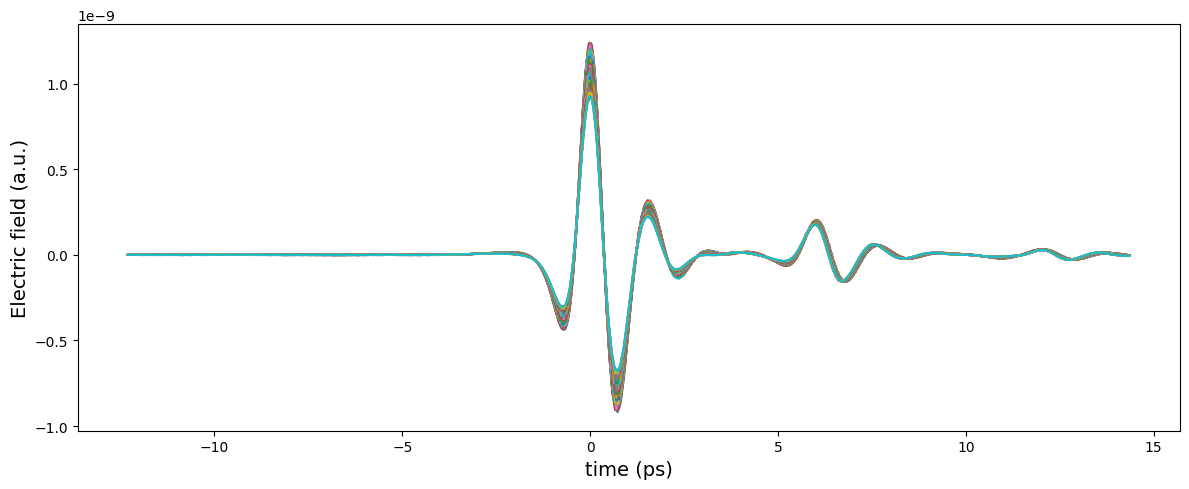

In [73]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_substrato_10_10.items():
    # if df[1]<200:
    #     continue
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()